In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U scikit-learn pandas pyyaml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 135.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have p

In [3]:
from pathlib import Path

# Jika dataset di Google Drive
dataset_path = Path("/content/drive/MyDrive/kfold5/train")

# Ambil semua file label .txt
labels = sorted(dataset_path.rglob("*labels/*.txt"))

print(f"Jumlah file label ditemukan: {len(labels)}")

Jumlah file label ditemukan: 900


In [4]:
import yaml

yaml_file = "/content/drive/MyDrive/kfold5/data.yaml"

with open(yaml_file, encoding="utf8") as y:
    classes = yaml.safe_load(y)["names"]

# Cek apakah 'classes' berupa dict atau list
if isinstance(classes, dict):
    cls_idx = sorted(classes.keys())
else:  # berarti list
    cls_idx = list(range(len(classes)))

print("Indeks Kelas:", cls_idx)
print("Daftar Kelas:", classes)

Indeks Kelas: [0, 1]
Daftar Kelas: ['baik', 'reject']


In [5]:
from collections import Counter
import pandas as pd

# Membuat indeks baris untuk setiap file label berdasarkan nama file (tanpa ekstensi)
index = [label.stem for label in labels]

# Membuat DataFrame kosong dengan kolom = indeks kelas dan baris = nama file
labels_df = pd.DataFrame(0, columns=cls_idx, index=index)

# Mengisi DataFrame dengan jumlah kemunculan setiap label di setiap file
for label in labels:
    lbl_counter = Counter()

    with open(label) as lf:
        lines = lf.readlines()

    for line in lines:
        # YOLO label: indeks kelas berada di awal baris
        class_id = int(line.split(" ", 1)[0])
        lbl_counter[class_id] += 1

    for class_id, count in lbl_counter.items():
        labels_df.loc[label.stem, class_id] = count

# Pastikan tidak ada NaN (opsional, karena sudah isi default 0)
labels_df = labels_df.fillna(0)

# Cek hasil
top_bottom = pd.concat([labels_df.head(5), labels_df.tail(5)])
print(top_bottom)


                                                    0  1
IMG_20250611_204139_jpg.rf.1632b4d204522a2c39f5...  0  1
IMG_20250611_204145_jpg.rf.1df6fd5e39d47b665484...  0  1
IMG_20250611_204155_jpg.rf.0f1d85b3e857f75e8c63...  0  1
IMG_20250611_204201_jpg.rf.3be24b5e099703572708...  0  1
IMG_20250611_204212_jpg.rf.2da29e91d4cc49ef5250...  0  1
unripe-82-_jpg.rf.6e4f25e35c68dc10e09dc9d7528fe5e9  1  0
unripe-84-_jpg.rf.7c650db5a2498bdec2bf1de19a9e4d38  1  0
unripe-90-_jpg.rf.1b152c94ff88045e30719003a7b22c92  1  0
unripe-91-_jpg.rf.3c75e7615cce310511f6a5b9d1bfab90  1  0
unripe-98-_jpg.rf.86c62ccba662efa9bacbf97b0bcba966  1  0


In [6]:
import random
import pandas as pd
from sklearn.model_selection import KFold

# Contoh: memuat DataFrame dummy (gantilah ini dengan labels_df milikmu)
# labels_df = pd.DataFrame(...)  # <-- pastikan kamu sudah punya ini

random.seed(0)  # (tidak digunakan langsung di bawah, tapi tetap aman untuk reproducibility)
ksplit = 5
kf = KFold(n_splits=ksplit, shuffle=True, random_state=20)

kfolds = list(kf.split(labels_df))

# Cetak hasil acakan indeks dan contoh datanya
for i, (train_idx, val_idx) in enumerate(kfolds):
    print(f"\nFold {i+1}:")
    print(f"Train indices (total {len(train_idx)}): {train_idx[:5]} ...")
    print(f"Validation indices (total {len(val_idx)}): {val_idx[:5]} ...")

    # Tampilkan 5 data teratas dari masing-masing
    train_data = labels_df.iloc[train_idx]
    val_data = labels_df.iloc[val_idx]

    print("\nSample Train Data:")
    print(train_data.head())

    print("\nSample Validation Data:")
    print(val_data.head())



Fold 1:
Train indices (total 720): [0 1 2 3 4] ...
Validation indices (total 180): [ 7  8  9 10 13] ...

Sample Train Data:
                                                    0  1
IMG_20250611_204139_jpg.rf.1632b4d204522a2c39f5...  0  1
IMG_20250611_204145_jpg.rf.1df6fd5e39d47b665484...  0  1
IMG_20250611_204155_jpg.rf.0f1d85b3e857f75e8c63...  0  1
IMG_20250611_204201_jpg.rf.3be24b5e099703572708...  0  1
IMG_20250611_204212_jpg.rf.2da29e91d4cc49ef5250...  0  1

Sample Validation Data:
                                                    0  1
IMG_20250611_204421_jpg.rf.d47e6f6715b1cd1766db...  0  1
IMG_20250611_204429_jpg.rf.9e91f9bd72eac965e762...  0  1
IMG_20250611_204438_jpg.rf.d18bb41c5dd1e0af4c54...  0  1
IMG_20250611_204530_jpg.rf.90507cc8797bc325e819...  0  1
IMG_20250704_124918_jpg.rf.3bbf2e64aefc6f737546...  0  1

Fold 2:
Train indices (total 720): [0 2 4 5 6] ...
Validation indices (total 180): [ 1  3 16 21 23] ...

Sample Train Data:
                                         

In [7]:
folds = [f"split_{n}" for n in range(1, ksplit + 1)]
folds_df = pd.DataFrame(index=index, columns=folds)

for i, (train, val) in enumerate(kfolds, start=1):
    folds_df.loc[labels_df.iloc[train].index, f"split_{i}"] = "train"
    folds_df.loc[labels_df.iloc[val].index, f"split_{i}"] = "val"

                0         1
split_1  0.223242  0.282051
split_2  0.269841  0.230769
split_3  0.223242  0.269841
split_4  0.277955  0.204819
split_5  0.257862  0.265823


<Axes: title={'center': 'Validation/Training Label Ratio per Fold'}>

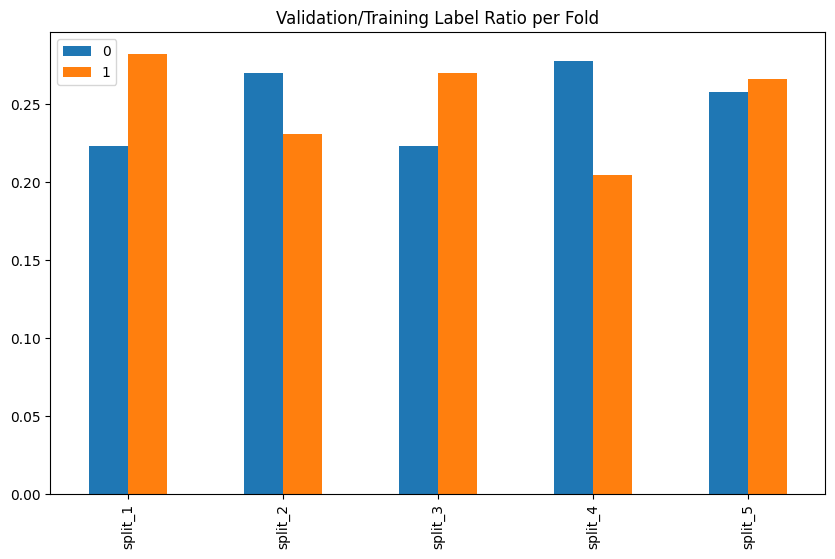

In [8]:
fold_lbl_distrb = pd.DataFrame(index=folds, columns=cls_idx)

for n, (train_indices, val_indices) in enumerate(kfolds, start=1):
    train_totals = labels_df.iloc[train_indices].sum()
    val_totals = labels_df.iloc[val_indices].sum()

    # To avoid division by zero, we add a small value (1E-7) to the denominator
    ratio = val_totals / (train_totals + 1e-7)
    fold_lbl_distrb.loc[f"split_{n}"] = ratio

print(fold_lbl_distrb)
fold_lbl_distrb.plot.bar(figsize=(10, 6), title="Validation/Training Label Ratio per Fold")


In [9]:
import datetime
from pathlib import Path
import yaml
import shutil
from tqdm import tqdm

# SETUP AWAL
dataset_path = Path("/content/drive/MyDrive/kfold5/train")  # ganti sesuai kebutuhan
ksplit = 5  # jumlah fold
supported_extensions = [".jpg", ".jpeg", ".png"]

# AMBIL SEMUA FILE GAMBAR
images = []
for ext in supported_extensions:
    images.extend(sorted((dataset_path / "images").rglob(f"*{ext}")))

# BANGUN LIST LABELS SESUAI DENGAN IMAGES
labels = [
    dataset_path / "labels" / img.relative_to(dataset_path / "images").with_suffix(".txt")
    for img in images
]

# BIKIN FOLDER OUTPUT SPLIT
save_path = dataset_path / f"{datetime.date.today().isoformat()}_{ksplit}-Fold_Cross-val"
save_path.mkdir(parents=True, exist_ok=True)

ds_yamls = []

# PROSES SETIAP FOLD
for split in folds_df.columns:
    split_dir = save_path / split
    for subfolder in ["train/images", "train/labels", "val/images", "val/labels"]:
        (split_dir / subfolder).mkdir(parents=True, exist_ok=True)

    dataset_yaml = split_dir / f"{split}_dataset.yaml"
    ds_yamls.append(dataset_yaml)

    with open(dataset_yaml, "w") as ds_y:
        yaml.safe_dump(
            {
                "path": split_dir.as_posix(),
                "train": "train",
                "val": "val",
                "names": classes,  # pastikan ini list atau dict nama kelas
            },
            ds_y,
            sort_keys=False
        )

# COPY FILE IMAGE DAN LABEL KE MASING-MASING FOLD
for image, label in tqdm(zip(images, labels), total=len(images), desc="Copying files"):
    for split, k_split in folds_df.loc[image.stem].items():
        img_to_path = save_path / split / k_split / "images"
        lbl_to_path = save_path / split / k_split / "labels"

        # Buat folder tujuan jika belum ada
        img_to_path.mkdir(parents=True, exist_ok=True)
        lbl_to_path.mkdir(parents=True, exist_ok=True)

        # Copy jika file berbeda
        shutil.copy(image, img_to_path / image.name)
        shutil.copy(label, lbl_to_path / label.name)

# INFO CEK
print(f"Jumlah images: {len(images)}")
print(f"Jumlah labels: {len(labels)}")


Copying files: 100%|██████████| 900/900 [01:56<00:00,  7.73it/s]

Jumlah images: 900
Jumlah labels: 900


In [10]:
folds_df.to_csv(save_path / "kfold_datasplit.csv")
fold_lbl_distrb.to_csv(save_path / "kfold_label_distribution.csv")

In [11]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00


In [12]:
from ultralytics import YOLO

weights_path = "yolo11n.pt"  # Gantilah sesuai file model
model = YOLO(weights_path, task="detect")  # Inisialisasi model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
print("Daftar YAML folds:")
for path in ds_yamls:
    print(path)

Daftar YAML folds:
/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_1/split_1_dataset.yaml
/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_2/split_2_dataset.yaml
/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_3/split_3_dataset.yaml
/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_4/split_4_dataset.yaml
/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_5/split_5_dataset.yaml


In [14]:
from ultralytics import YOLO

# Hyperparameter hasil perbaikan
config = {
    # --- Training setup ---
    "epochs": 50,
    "batch": 16,
    "optimizer": "AdamW",

    # --- Learning Rate & Schedule ---
    "lr0": 0.003,           # sedikit lebih tinggi
    "lrf": 0.1,             # final lr fraction lebih smooth
    "momentum": 0.937,
    "weight_decay": 0.01,   # lebih cocok untuk AdamW

    # --- Warmup ---
    "warmup_epochs": 3.0,
    "warmup_momentum": 0.8,
    "warmup_bias_lr": 0.1,

    # --- Loss balancing ---
    "box": 6.0,             # sedikit diturunkan
    "cls": 1.0,             # ditingkatkan biar klasifikasi lebih diperhatikan
    "dfl": 1.5,

    # --- Augmentasi ---
    "hsv_h": 0.015,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "degrees": 0.0,
    "translate": 0.1,
    "scale": 0.3,           # lebih realistis
    "fliplr": 0.5,
    "flipud": 0.0,
    "mosaic": 0.8,          # sedikit diturunkan
    "mixup": 0.0,
    "shear": 2.0,           # tambahan variasi ringan
}

results = {}

for k, dataset_yaml in enumerate(ds_yamls):
    model = YOLO(weights_path, task="detect")
    results[k] = model.train(
        data=dataset_yaml,
        project="kfold_demo_fix",
        name=f"fold{k+1}",
        **config
    )


Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=6.0, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.0, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/kfold5/train/2025-09-05_5-Fold_Cross-val/split_1/split_1_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=fold1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True,

In [15]:
from google.colab import drive
import shutil
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Lokasi folder sumber dan tujuan
src_folder = "/content/kfold_demo_fix"  # Folder hasil training YOLO
dst_folder = "/content/drive/MyDrive/kfold_demo_fix"  # Tujuan di Google Drive

# 3. Cek apakah sumber ada
if not os.path.exists(src_folder):
    print(f"❌ Folder sumber tidak ditemukan: {src_folder}")
else:
    # 4. Salin seluruh folder ke Google Drive
    shutil.copytree(src_folder, dst_folder, dirs_exist_ok=True)
    print(f"✅ Semua hasil training dari '{src_folder}' berhasil disalin ke Drive di '{dst_folder}'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Semua hasil training dari '/content/kfold_demo_fix' berhasil disalin ke Drive di '/content/drive/MyDrive/kfold_demo_fix'


📊 Hasil Evaluasi Tiap Fold:
    Fold  Precision   Recall  F1-score    mAP50  mAP50_95  Train_Loss  \
0  fold1    0.97349  0.97494  0.974214  0.98605   0.93154     0.21855   
1  fold2    0.99240  0.99333  0.992865  0.99440   0.94644     0.21856   
2  fold3    0.97452  0.99077  0.982578  0.99385   0.94584     0.22071   
3  fold4    0.98619  0.94740  0.966406  0.99402   0.93880     0.20973   
4  fold5    0.96719  0.97506  0.971109  0.98521   0.94296     0.22332   

   Val_Loss  
0   0.29734  
1   0.26416  
2   0.27110  
3   0.28219  
4   0.27500  

📈 Statistik Deskriptif:
       Precision    Recall  F1-score     mAP50  mAP50_95  Train_Loss  Val_Loss
count   5.000000  5.000000  5.000000  5.000000  5.000000    5.000000  5.000000
mean    0.978758  0.976300  0.977434  0.990706  0.941116    0.218174  0.277958
std     0.010258  0.018289  0.010447  0.004648  0.006147    0.005111  0.012647
min     0.967190  0.947400  0.966406  0.985210  0.931540    0.209730  0.264160
25%     0.973490  0.974940  0

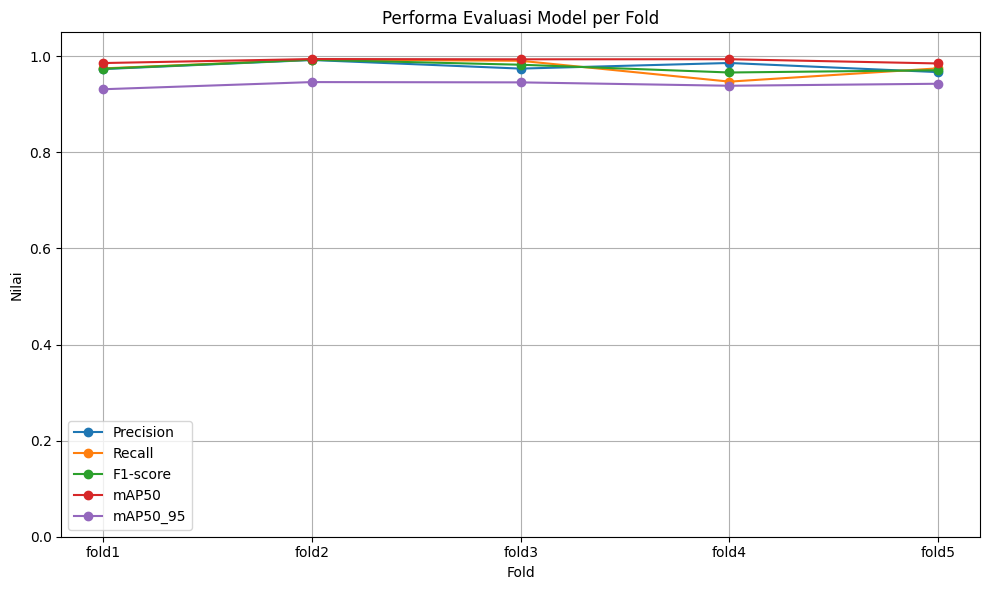

In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Lokasi folder kfold_demo
base_path = Path("kfold_demo_fix")
folds = [f"fold{i}" for i in range(1, 6)]

# Simpan hasil
summary = []

for fold in folds:
    file_path = base_path / fold / "results.csv"
    try:
        df = pd.read_csv(file_path)
        last = df.iloc[-1]

        precision = last.get("metrics/precision(B)", None)
        recall = last.get("metrics/recall(B)", None)

        # Hitung F1-score jika precision dan recall tersedia
        if precision and recall and precision + recall > 0:
            f1_score = 2 * (precision * recall) / (precision + recall)
        else:
            f1_score = None

        summary.append({
            "Fold": fold,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1_score,
            "mAP50": last.get("metrics/mAP50(B)", None),
            "mAP50_95": last.get("metrics/mAP50-95(B)", None),
            "Train_Loss": last.get("train/box_loss", None),
            "Val_Loss": last.get("val/box_loss", None),
        })

    except FileNotFoundError:
        print(f"[!] File tidak ditemukan di: {file_path}")
    except Exception as e:
        print(f"[!] Error membaca {file_path}: {e}")

# Gabung ke DataFrame
df_all = pd.DataFrame(summary)

# Tampilkan hasil per fold
print("📊 Hasil Evaluasi Tiap Fold:")
print(df_all)

# Statistik deskriptif
print("\n📈 Statistik Deskriptif:")
print(df_all.drop(columns="Fold").astype(float).describe())

# Rata-rata Evaluasi
print("\n📌 Rata-Rata Evaluasi:")
print(df_all.drop(columns="Fold").astype(float).mean())

# Tentukan fold terbaik berdasarkan F1-score
best_fold = df_all.loc[df_all["F1-score"].astype(float).idxmax()]
print(f"\n🏆 Fold terbaik berdasarkan F1-score adalah: {best_fold['Fold']}")
print(best_fold)

# Plot grafik
plt.figure(figsize=(10, 6))
metrics = ["Precision", "Recall", "F1-score", "mAP50", "mAP50_95"]
for metric in metrics:
    plt.plot(df_all["Fold"], df_all[metric], marker='o', label=metric)

plt.title("Performa Evaluasi Model per Fold")
plt.xlabel("Fold")
plt.ylabel("Nilai")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# === STEP 1: Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === STEP 2: Import & Setup ===
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Folder output di Google Drive
save_dir = Path("/content/drive/MyDrive/kfold_summary_output_fix")
save_dir.mkdir(exist_ok=True)

# Lokasi folder kfold_demo di Colab (upload sendiri ke sini)
base_path = Path("/content/kfold_demo_fix")
folds = [f"fold{i}" for i in range(1, 6)]

# Simpan hasil
summary = []

for fold in folds:
    file_path = base_path / fold / "results.csv"
    try:
        df = pd.read_csv(file_path)
        last = df.iloc[-1]

        precision = last.get("metrics/precision(B)", None)
        recall = last.get("metrics/recall(B)", None)

        if precision and recall and precision + recall > 0:
            f1_score = 2 * (precision * recall) / (precision + recall)
        else:
            f1_score = None

        summary.append({
            "Fold": fold,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1_score,
            "mAP50": last.get("metrics/mAP50(B)", None),
            "mAP50_95": last.get("metrics/mAP50-95(B)", None),
            "Train_Loss": last.get("train/box_loss", None),
            "Val_Loss": last.get("val/box_loss", None),
        })

    except FileNotFoundError:
        print(f"[!] File tidak ditemukan di: {file_path}")
    except Exception as e:
        print(f"[!] Error membaca {file_path}: {e}")

df_all = pd.DataFrame(summary)
df_all = df_all.astype({
    "Precision": float, "Recall": float, "F1-score": float,
    "mAP50": float, "mAP50_95": float,
    "Train_Loss": float, "Val_Loss": float
})

# Statistik deskriptif & rata-rata
stats = df_all.drop(columns=["Fold"]).describe()
mean_row = stats.loc["mean"]

# Fold terbaik
best_fold = df_all.loc[df_all["F1-score"].idxmax()]
best_summary = best_fold.to_frame().T
best_summary.insert(0, "Keterangan", "Best Fold")

# Simpan CSV dan Excel
df_all.to_csv(save_dir / "evaluasi_per_fold.csv", index=False)
stats.to_csv(save_dir / "statistik_deskriptif.csv")
best_summary.to_csv(save_dir / "fold_terbaik.csv", index=False)

with pd.ExcelWriter(save_dir / "ringkasan_kfold.xlsx") as writer:
    df_all.to_excel(writer, sheet_name="Per Fold", index=False)
    stats.to_excel(writer, sheet_name="Statistik", index=True)
    best_summary.to_excel(writer, sheet_name="Fold Terbaik", index=False)

# === Grafik Gabungan ===
fold_labels = df_all["Fold"]
colors = ['#2E86AB', '#F6AE2D', '#A23B72', '#007F5F', '#D7263D']

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

metrics_to_plot = ["F1-score", "mAP50", "mAP50_95"]
titles = ["F1-score per Fold", "mAP@50 per Fold", "mAP@50-95 per Fold"]
ylims = [(0.95, 1.0), (0.95, 1.0), (0.89, 0.92)]

for i, (metric, title, ylim) in enumerate(zip(metrics_to_plot, titles, ylims)):
    axs[i].bar(fold_labels, df_all[metric], color=colors)
    axs[i].set_title(title)
    axs[i].set_ylim(*ylim)
    axs[i].set_xlabel("Fold")
    axs[i].set_ylabel("Score")
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)
    axs[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.3f}'))

    for j, val in enumerate(df_all[metric]):
        axs[i].text(j, val + (ylim[1] - ylim[0]) * 0.015, f"{val:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig(save_dir / "perbandingan_metric_per_fold.png")
plt.close()

# === Grafik Rata-rata Metrik ===
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_row.index, mean_row.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.003, f'{yval:.4f}', ha='center', fontsize=10)
plt.title("📌 Rata-rata Evaluasi Semua Fold")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(save_dir / "rata_rata_metric.png")
plt.close()

# === Grafik Fold Terbaik ===
plt.figure(figsize=(10, 6))
bars = plt.bar(best_fold.drop("Fold").index, best_fold.drop("Fold").values, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.003, f'{yval:.4f}', ha='center', fontsize=10)
plt.title(f"🏆 Fold Terbaik: {best_fold['Fold']}")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(save_dir / "fold_terbaik.png")
plt.close()

# === Grafik Statistik Deskriptif ===
plt.figure(figsize=(12, 6))
metrics = mean_row.index
stds = stats.loc["std"].values
bars = plt.bar(metrics, mean_row.values, yerr=stds, capsize=5, color='lightgreen')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.003, f'{yval:.4f}', ha='center', fontsize=10)
plt.title("📈 Statistik Deskriptif: Mean ± Std")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(save_dir / "statistik_deskriptif_plot.png")
plt.close()

print(f"\n✅ Semua grafik dan file telah disimpan di: {save_dir.resolve()}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2289273082.py:115: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2289273082.py:116: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir / "rata_rata_metric.png")
/tmp/ipython-input-2289273082.py:129: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2289273082.py:130: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir / "fold_terbaik.png")
/tmp/ipython-input-2289273082.py:145: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



✅ Semua grafik dan file telah disimpan di: /content/drive/MyDrive/kfold_summary_output_fix


/tmp/ipython-input-2289273082.py:146: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir / "statistik_deskriptif_plot.png")


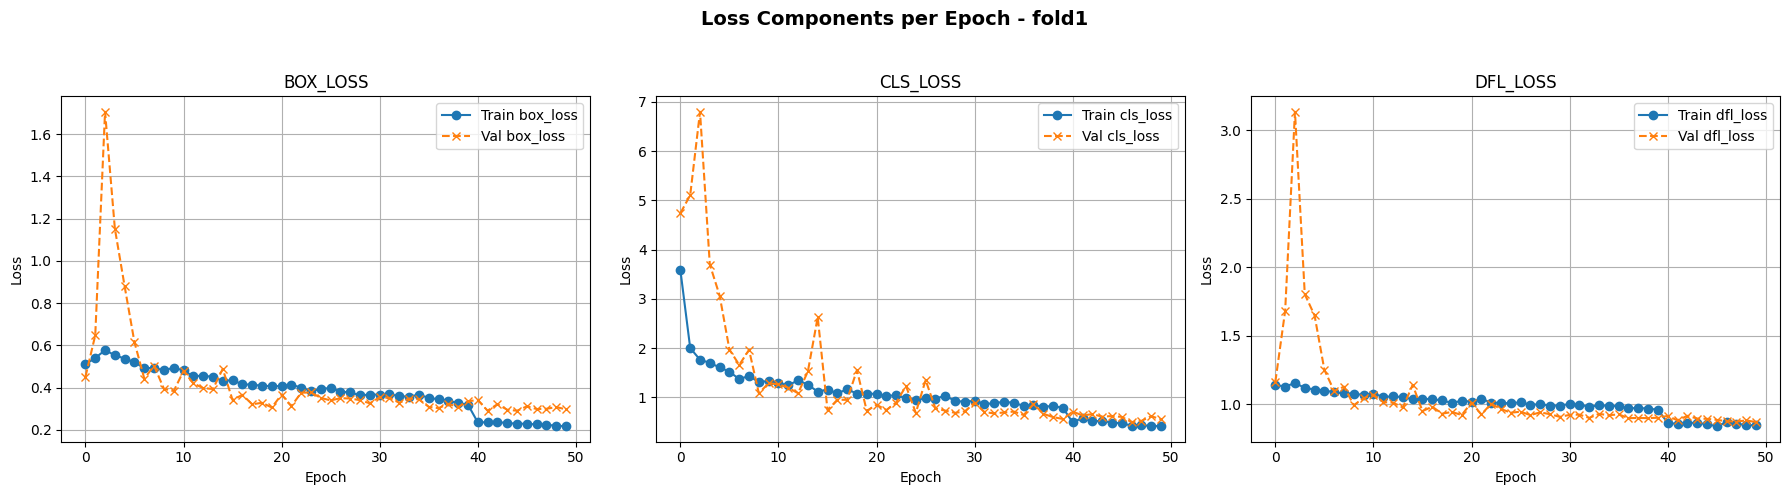

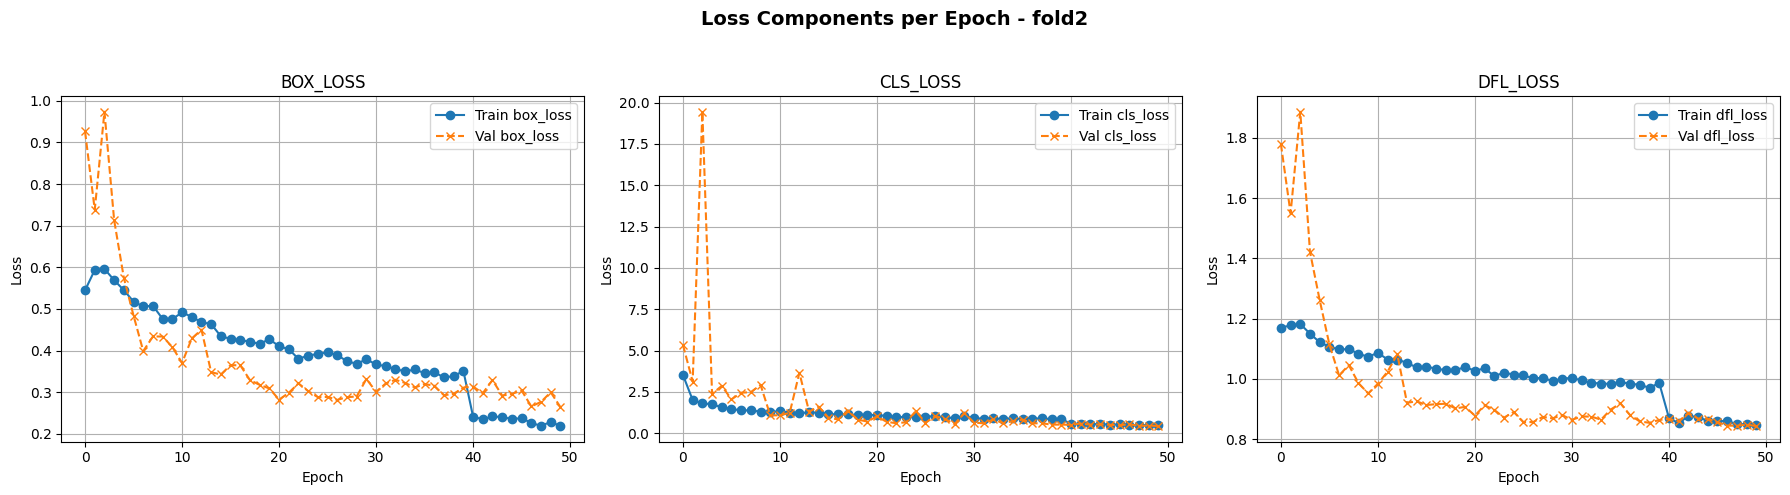

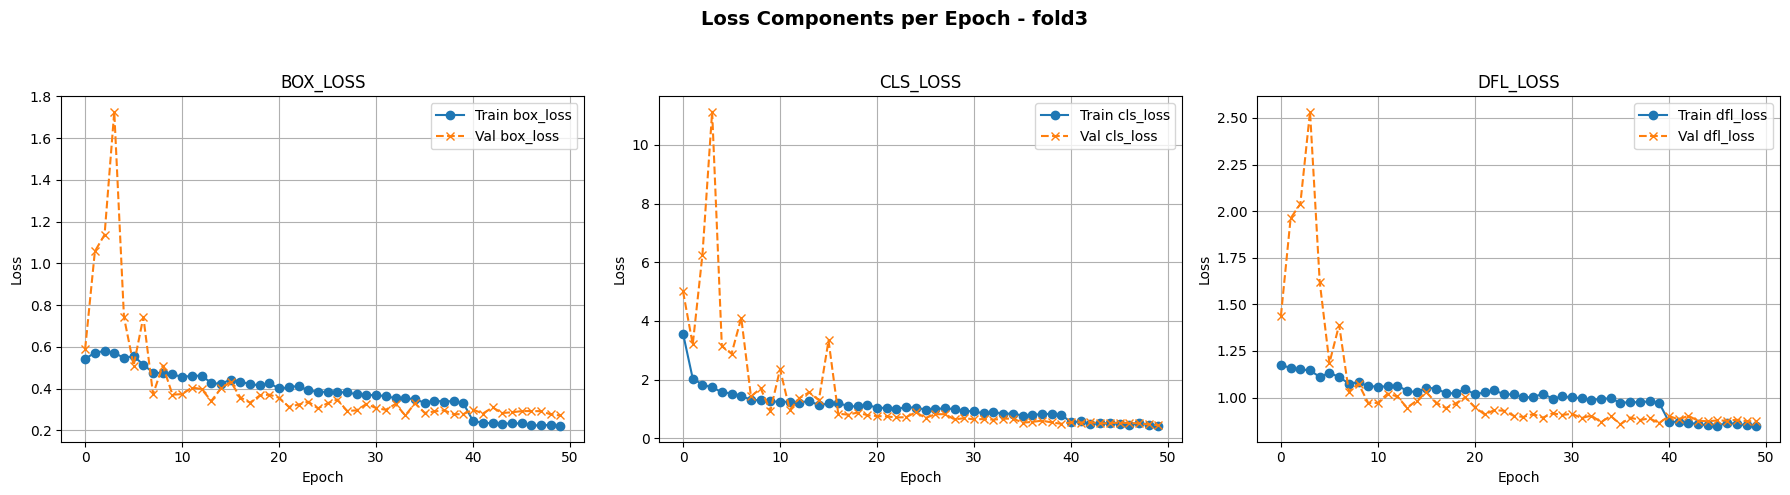

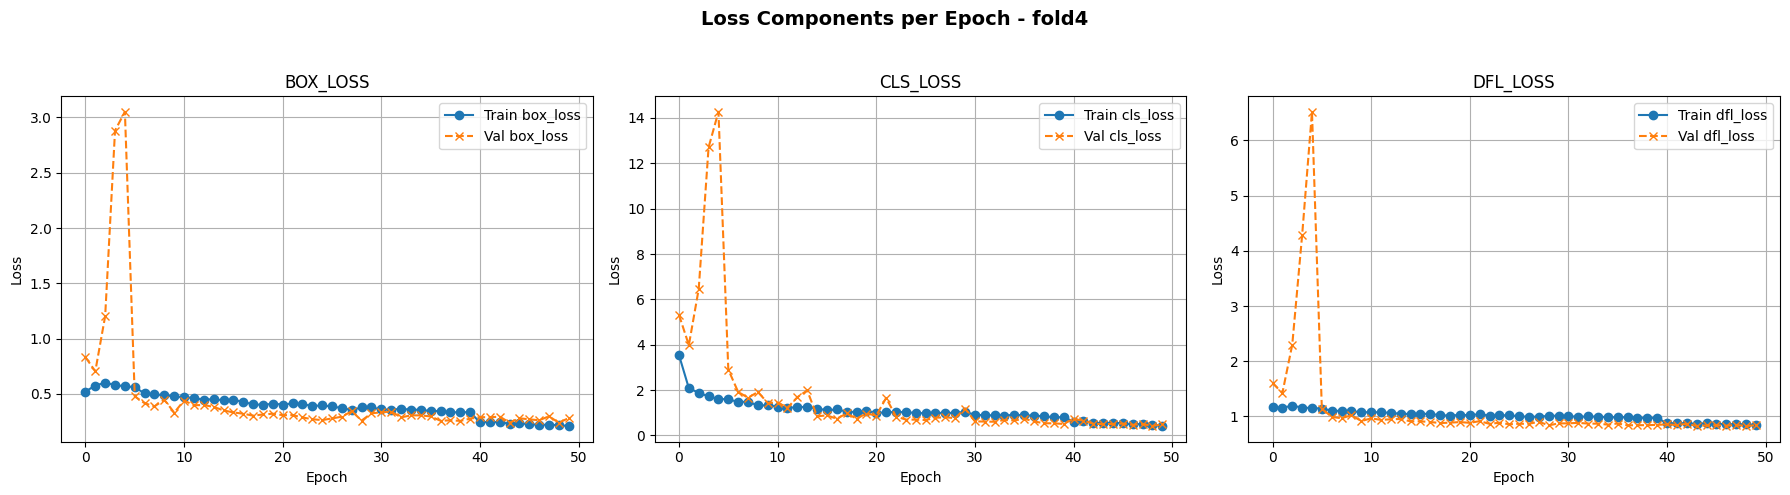

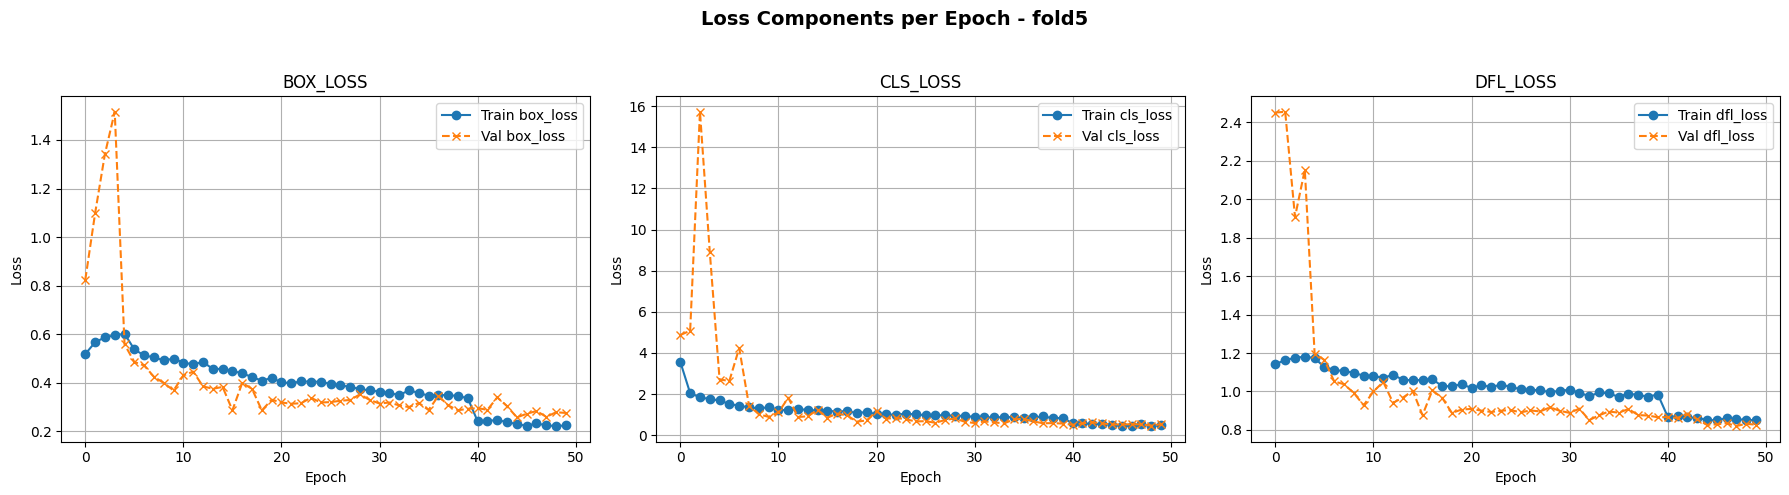

In [18]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Lokasi folder kfold_demo
base_path = Path("/content/kfold_demo_fix")
folds = [f"fold{i}" for i in range(1, 6)]

# Komponen loss yang ingin dibandingkan
loss_components = ["box_loss", "cls_loss", "dfl_loss"]

# Loop tiap fold
for fold in folds:
    file_path = base_path / fold / "results.csv"
    try:
        df = pd.read_csv(file_path)

        # Buat figure dengan 3 kolom (box, cls, dfl) per fold
        fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
        fig.suptitle(f"Loss Components per Epoch - {fold}", fontsize=14, fontweight="bold")

        for i, loss in enumerate(loss_components):
            train_col = f"train/{loss}"
            val_col = f"val/{loss}"

            if train_col in df.columns and val_col in df.columns:
                axes[i].plot(df.index, df[train_col], label=f"Train {loss}", linestyle='-', marker='o')
                axes[i].plot(df.index, df[val_col], label=f"Val {loss}", linestyle='--', marker='x')
                axes[i].set_title(loss.upper())
                axes[i].set_xlabel("Epoch")
                axes[i].set_ylabel("Loss")
                axes[i].grid(True)
                axes[i].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # biar suptitle tidak ketimpa
        plt.show()

    except FileNotFoundError:
        print(f"[!] File tidak ditemukan di: {file_path}")
    except Exception as e:
        print(f"[!] Error membaca {file_path}: {e}")


In [19]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from scipy import stats
import numpy as np

# Baca file CSV (ganti path sesuai lokasi file di Google Drive)
df = pd.read_csv("/content/drive/MyDrive/kfold_demo_fix/fold2/results.csv")

# Pasangan train–val
pairs = [
    ("train/box_loss", "val/box_loss", "Box"),
    ("train/cls_loss", "val/cls_loss", "Cls"),
    ("train/dfl_loss", "val/dfl_loss", "Dfl")
]

# Fungsi Cohen's d
def cohens_d(x, y):
    diff = y - x
    return diff.mean() / diff.std(ddof=1)

# Hasil komprehensif
for train_col, val_col, name in pairs:
    train_vals = df[train_col]
    val_vals = df[val_col]

    mean_train = np.mean(train_vals)
    mean_val = np.mean(val_vals)
    std_train = np.std(train_vals, ddof=1)
    std_val = np.std(val_vals, ddof=1)

    t_stat, p_val = stats.ttest_rel(train_vals, val_vals)
    d = cohens_d(train_vals, val_vals)

    print(f"=== {name} Loss ===")
    print(f"Rata-rata Train: {mean_train:.4f} (SD={std_train:.4f})")
    print(f"Rata-rata Val  : {mean_val:.4f} (SD={std_val:.4f})")
    print(f"t-stat         : {t_stat:.4f}")
    print(f"p-value        : {p_val:.4f}")
    print(f"Cohen's d      : {d:.4f}")

    # Interpretasi
    if p_val < 0.05:
        signif = "Ada perbedaan signifikan"
    else:
        signif = "Tidak ada perbedaan signifikan"

    if abs(d) < 0.2:
        effect = "efek sangat kecil"
    elif abs(d) < 0.5:
        effect = "efek kecil"
    elif abs(d) < 0.8:
        effect = "efek sedang"
    else:
        effect = "efek besar"

    print(f">> Interpretasi: {signif} antara Train dan Val dengan {effect}.\n")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Box Loss ===
Rata-rata Train: 0.3899 (SD=0.1038)
Rata-rata Val  : 0.3747 (SD=0.1541)
t-stat         : 0.9977
p-value        : 0.3233
Cohen's d      : -0.1411
>> Interpretasi: Tidak ada perbedaan signifikan antara Train dan Val dengan efek sangat kecil.

=== Cls Loss ===
Rata-rata Train: 1.0652 (SD=0.5005)
Rata-rata Val  : 1.5535 (SD=2.7675)
t-stat         : -1.3523
p-value        : 0.1825
Cohen's d      : 0.1912
>> Interpretasi: Tidak ada perbedaan signifikan antara Train dan Val dengan efek sangat kecil.

=== Dfl Loss ===
Rata-rata Train: 1.0061 (SD=0.0904)
Rata-rata Val  : 0.9721 (SD=0.2256)
t-stat         : 1.3711
p-value        : 0.1766
Cohen's d      : -0.1939
>> Interpretasi: Tidak ada perbedaan signifikan antara Train dan Val dengan efek sangat kecil.

